# Pymaceuticals Inc.
---

### Analysis

- Mouse weight and the average tumor volume have a high positive correlation (correlation value = 0.84).

## Prepare the Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset called df
df = study_results.merge(mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
len(df['Mouse ID'].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_count = df.groupby(['Mouse ID', 'Timepoint']).count()
mice_count = mice_count.loc[mice_count['Tumor Volume (mm3)']>1]
mice_count

Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID Timepoint                                                            
g989     0                           2                 2             2    2   
         5                           2                 2             2    2   
         10                          2                 2             2    2   
         15                          2                 2             2    2   
         20                          2                 2             2    2   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
g989     0                   2           2  
         5                   2           2  
         10                  2           2  
         15                  2           2  
         20                  2           2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID']!='g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.

len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
    #and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_group = clean_df.groupby('Drug Regimen')

drug_df = pd.DataFrame()

drug_df['Mean Tumor Volume'] = drug_group['Tumor Volume (mm3)'].mean()
drug_df['Median Tumor Volume'] = drug_group['Tumor Volume (mm3)'].median()
drug_df['Tumor Volume Variance'] = drug_group['Tumor Volume (mm3)'].var()
drug_df['Tumor Volume Std. Dev.'] = drug_group['Tumor Volume (mm3)'].std()
drug_df['Tumor Volume Std. Err.'] = drug_group['Tumor Volume (mm3)'].sem()


drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var','std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

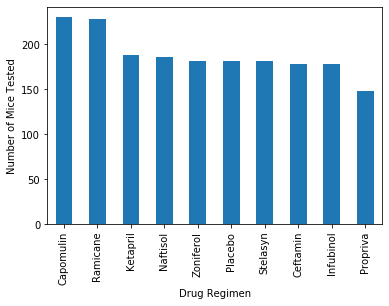

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_data = clean_df["Drug Regimen"].value_counts()
figure1 = drug_data.plot(kind="bar")
figure1.set_xlabel("Drug Regimen")
figure1.set_ylabel("Number of Mice Tested")
figure1

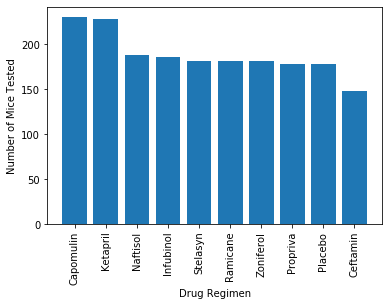

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_list = clean_df['Drug Regimen'].unique()
plt.bar(drug_list, drug_data)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Mice Tested')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd409655810>],
      dtype=object)

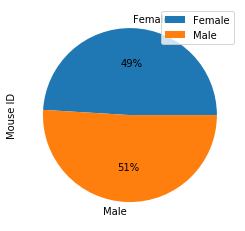

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = clean_df[['Mouse ID', 'Sex']]

gender_df.groupby(['Sex']).count().plot(kind='pie', subplots = True, autopct='%1.0f%%')


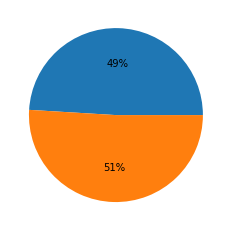

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female = int(gender_df.Sex.str.count("Female").sum())
male = int(gender_df.Sex.str.count("Male").sum())
gender_data = [female, male]
plt.pie(gender_data, autopct='%1.0f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_index_df = pd.DataFrame(clean_df.set_index('Drug Regimen'))
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_index_df = drug_index_df.loc[drugs]
drug_index_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Capomulin,b128,5,45.651331,0,Female,9,22
Capomulin,b128,10,43.270852,0,Female,9,22
Capomulin,b128,15,43.784893,0,Female,9,22
Capomulin,b128,20,42.731552,0,Female,9,22
...,...,...,...,...,...,...,...
Ceftamin,q483,25,52.430066,1,Male,6,26
Ceftamin,q483,30,54.952226,1,Male,6,26
Ceftamin,q483,35,59.253484,1,Male,6,26


In [14]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = drug_index_df.drop_duplicates(subset = 'Mouse ID', keep = 'last')
last_timepoint_df
# This gives the 100 mice that used this drug at the last timepoint with all the included data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,45,38.982878,2,Female,9,22
Capomulin,j246,35,38.753265,1,Female,21,21
Capomulin,r554,45,32.377357,3,Female,8,17
Capomulin,s185,45,23.343598,1,Female,3,17
Capomulin,b742,45,38.939633,0,Male,7,21
...,...,...,...,...,...,...,...
Ceftamin,p438,45,61.433892,1,Female,11,26
Ceftamin,b487,25,56.057749,1,Female,6,28
Ceftamin,o287,45,59.741901,4,Male,2,28


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drugs

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    
    

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

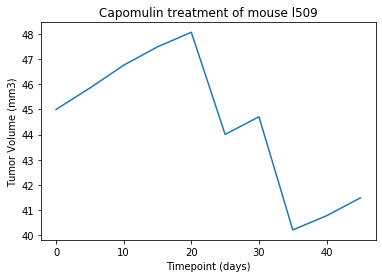

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509_df = pd.DataFrame(clean_df.set_index('Mouse ID'))
l509_df = l509_df.loc['l509']

#x is tumor volume
x = l509_df['Timepoint']
#y is time point
y = l509_df['Tumor Volume (mm3)']

plt.plot(x, y)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


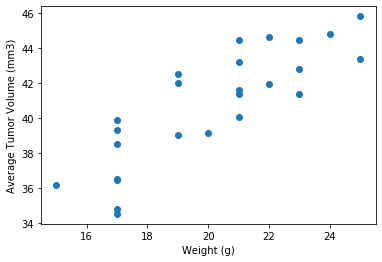

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = pd.DataFrame(clean_df.set_index('Drug Regimen'))
capomulin_df = capomulin_df.loc['Capomulin']

ave_df = capomulin_df.groupby('Mouse ID').mean()
#x is mouse weight
x = ave_df['Weight (g)']
#y is average tumor volume
y = ave_df['Tumor Volume (mm3)']

plt.scatter(x, y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


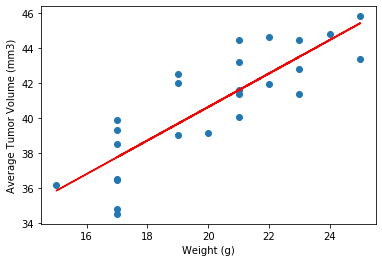

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_df = pd.DataFrame(clean_df.set_index('Drug Regimen'))
capomulin_df = capomulin_df.loc['Capomulin']
ave_df = capomulin_df.groupby('Mouse ID').mean()
x = ave_df['Weight (g)']
y = ave_df['Tumor Volume (mm3)']


# Calculate the correlation coefficient 
weight = ave_df.loc[:,'Weight (g)']
volume = ave_df.loc[:, 'Tumor Volume (mm3)'] 
correlation,p = st.pearsonr(weight, volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}")


# Add the linear regression equation and line to plot
slope, intercept, rvalue, pvalue, stderr = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot the trend line
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()